In [1]:
import pandas as pd

In [87]:
from IPython.display import display

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("C:/Users/a856994/Downloads/datascienceassignment/naives bayes/SalaryData_Train.csv")

In [5]:
df.shape

(30161, 14)

In [6]:
df=df.drop([1145,3524,5124,6934,7001,9859,10134,11725,13186,13661,13987,14154,15504,17112,17288,20719,21084,21363,21942,23750,24170,24500,25405,26195,26272,1405,1481,1543,2136,2171,28005,28619,29457,29593,29838,1404,1479,1540,2132,2166,27999,28612,29449,29584,29828,1403,1477,1537,2128,2161,27993,28605,29441,29575,29818,1402,1475,1534,2124,2156,27987,28598,29433,29566,29808,35,1735,2629,2765,3457,7395,10991,13065,16683,16720,17078,17484,21738,23248,23485,23868,25011,25190,27651,29013,29821,1733,2626,2761,3452,4648,4730,5890,6038,7389,7769,8013,8519,10577,10984,11193,12025,13057,14195,14350,15166,16710,17018,17472,19503,20536,21345,21725,22251,22749,23234,23470,23676,24994,25031,25172,27632,27962,29537,29754])

In [7]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30036.000000,30036.000000,30036.000000,30036.000000,30036.000000
mean,38.426755,10.117626,1021.449327,88.115994,40.922659
std,13.129352,2.546896,6920.590255,402.932775,11.973289
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30036 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30036 non-null  int64 
 1   workclass      30036 non-null  object
 2   education      30036 non-null  object
 3   educationno    30036 non-null  int64 
 4   maritalstatus  30036 non-null  object
 5   occupation     30036 non-null  object
 6   relationship   30036 non-null  object
 7   race           30036 non-null  object
 8   sex            30036 non-null  object
 9   capitalgain    30036 non-null  int64 
 10  capitalloss    30036 non-null  int64 
 11  hoursperweek   30036 non-null  int64 
 12  native         30036 non-null  object
 13  Salary         30036 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.4+ MB


In [10]:
df.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.041588,0.071940,0.058961,0.100991
educationno,0.041588,1.000000,0.113076,0.080642,0.150573
capitalgain,0.071940,0.113076,1.000000,-0.032278,0.078167
capitalloss,0.058961,0.080642,-0.032278,1.000000,0.053269
hoursperweek,0.100991,0.150573,0.078167,0.053269,1.000000


In [11]:
df.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
df.duplicated().sum()

3238

In [14]:
df.iloc[df.values==np.inf].sum()

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

In [15]:
#EDA

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Salary')

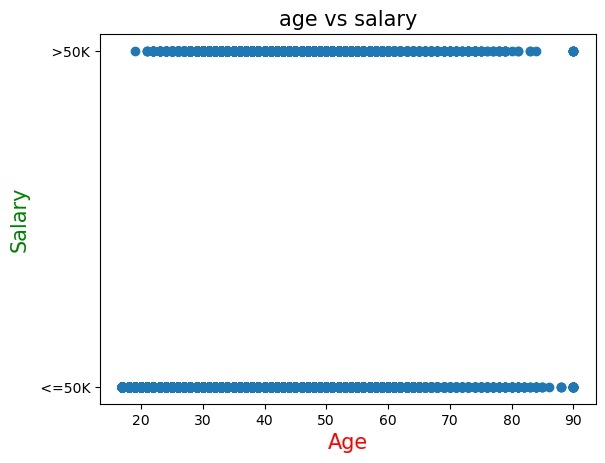

In [17]:
plt.scatter(df["age"],df["Salary"])
plt.title("age vs salary",color="black",size=15)
plt.xlabel("Age",color="red",size=15)
plt.ylabel("Salary",color="green",size=15)

Text(0, 0.5, 'Salary')

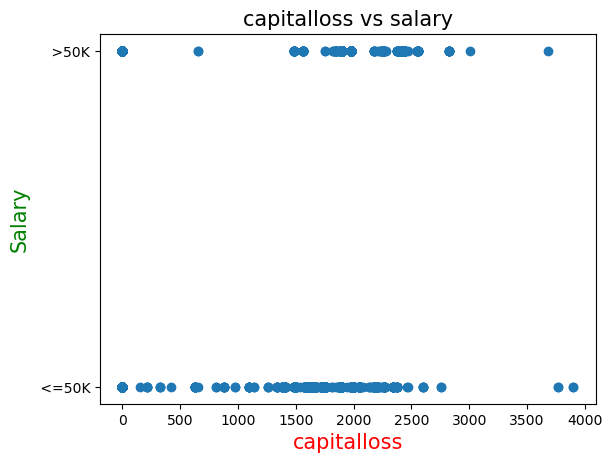

In [18]:
plt.scatter(df["capitalloss"],df["Salary"])
plt.title("capitalloss vs salary",color="black",size=15)
plt.xlabel("capitalloss",color="red",size=15)
plt.ylabel("Salary",color="green",size=15)

Text(0, 0.5, 'Salary')

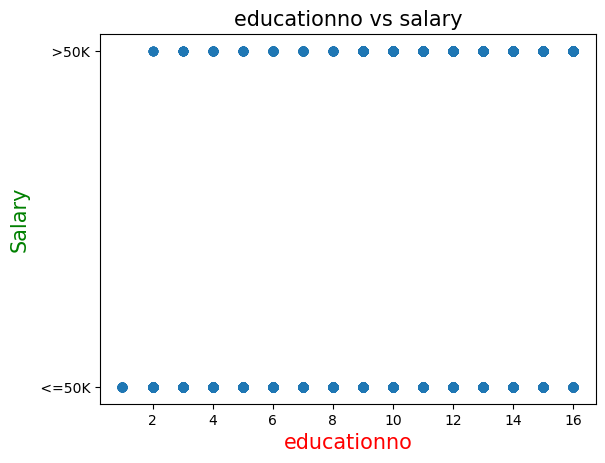

In [19]:
plt.scatter(df["educationno"],df["Salary"])
plt.title("educationno vs salary",color="black",size=15)
plt.xlabel("educationno",color="red",size=15)
plt.ylabel("Salary",color="green",size=15)

Text(0, 0.5, 'Salary')

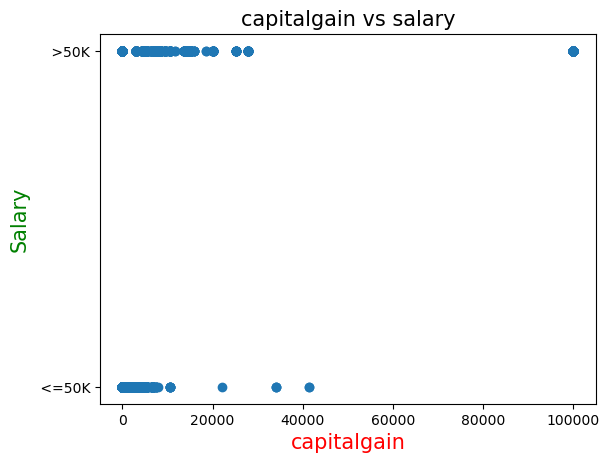

In [20]:
plt.scatter(df["capitalgain"],df["Salary"])
plt.title("capitalgain vs salary",color="black",size=15)
plt.xlabel("capitalgain",color="red",size=15)
plt.ylabel("Salary",color="green",size=15)

Text(0, 0.5, 'Salary')

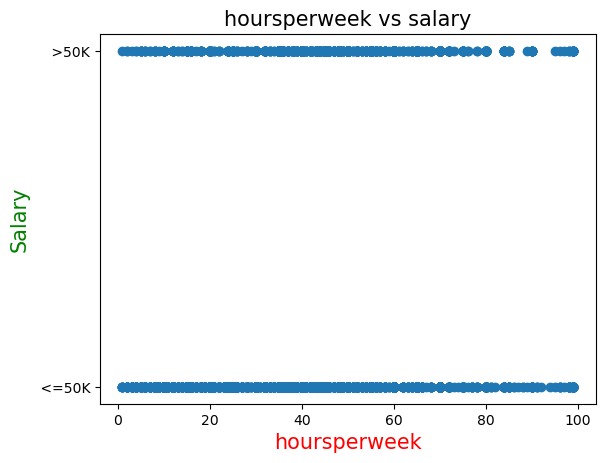

In [21]:
plt.scatter(df["hoursperweek"],df["Salary"])
plt.title("hoursperweek vs salary",color="black",size=15)
plt.xlabel("hoursperweek",color="red",size=15)
plt.ylabel("Salary",color="green",size=15)

In [22]:
#histogram

<AxesSubplot:>

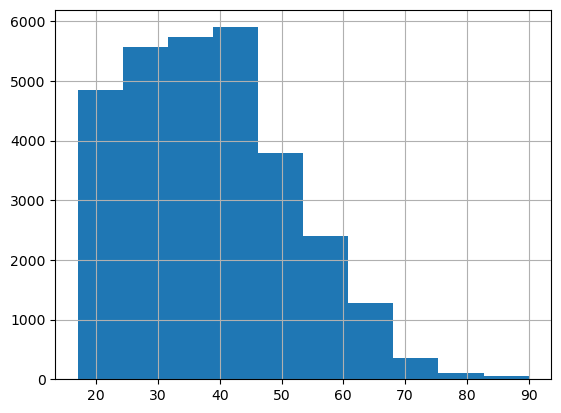

In [23]:
df["age"].hist()

<AxesSubplot:>

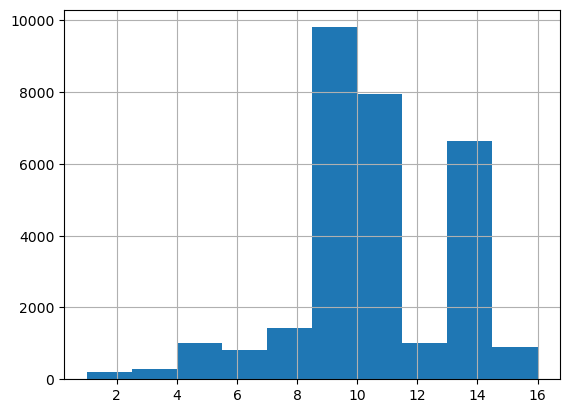

In [24]:
df["educationno"].hist()

<AxesSubplot:>

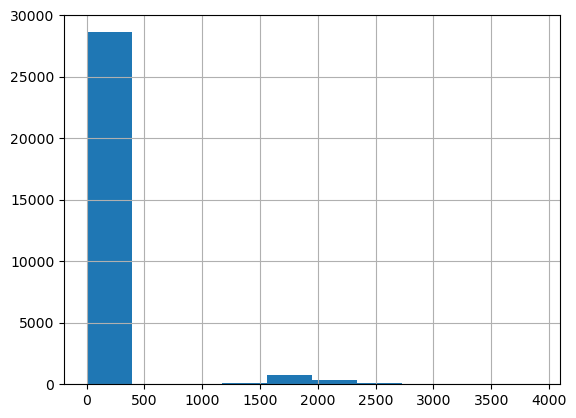

In [25]:
df["capitalloss"].hist()

<AxesSubplot:>

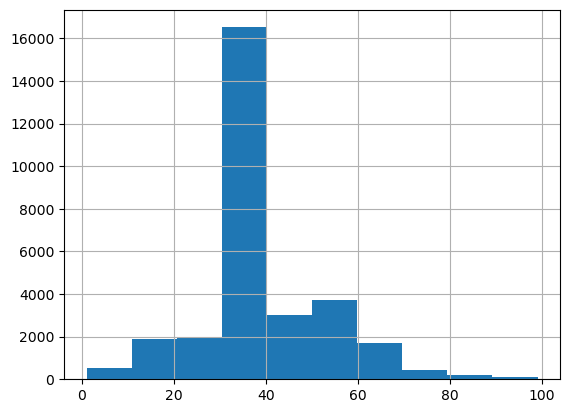

In [26]:
df["hoursperweek"].hist()

<AxesSubplot:>

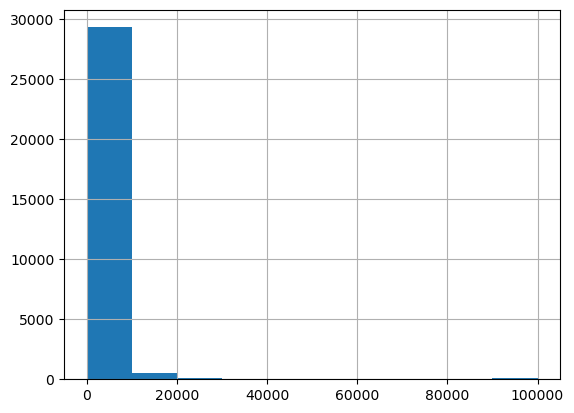

In [27]:
df["capitalgain"].hist()

In [28]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [29]:
skew(df["age"])

0.5302270422519324

In [30]:
kurtosis(df["age"])

-0.1442776413787641

In [31]:
skew(df["educationno"])

-0.30674494974827504

In [32]:
kurtosis(df["educationno"])

0.6446808603124792

In [33]:
skew(df["capitalgain"])

12.541416695618233

In [34]:
kurtosis(df["capitalgain"])

173.2824641341309

In [35]:
skew(df["capitalloss"])

4.507070449452256

In [36]:
kurtosis(df["capitalloss"])

19.169251292377663

In [37]:
skew(df["hoursperweek"])

0.3302456621040719

In [38]:
kurtosis(df["hoursperweek"])

3.172050138744156

In [39]:
#bar graph

<AxesSubplot:>

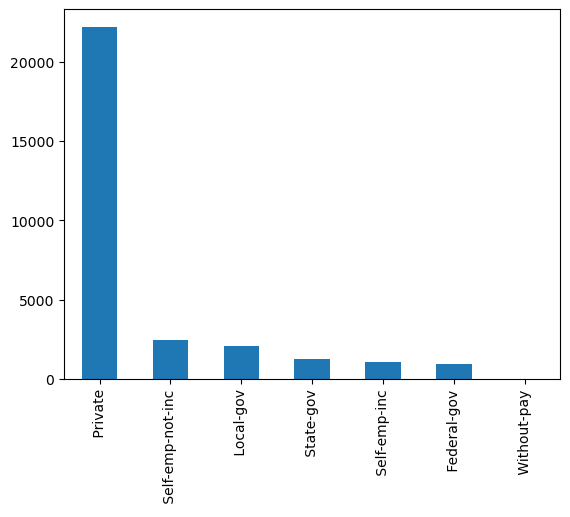

In [40]:
d1=df["workclass"].value_counts()
d1.plot(kind="bar")

<AxesSubplot:>

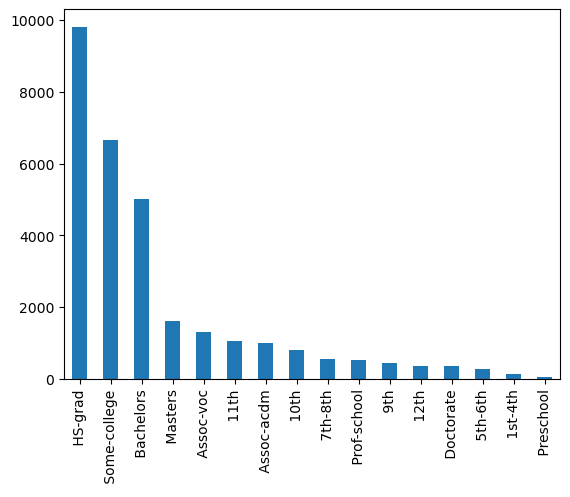

In [41]:
d1=df["education"].value_counts()
d1.plot(kind="bar")

<AxesSubplot:>

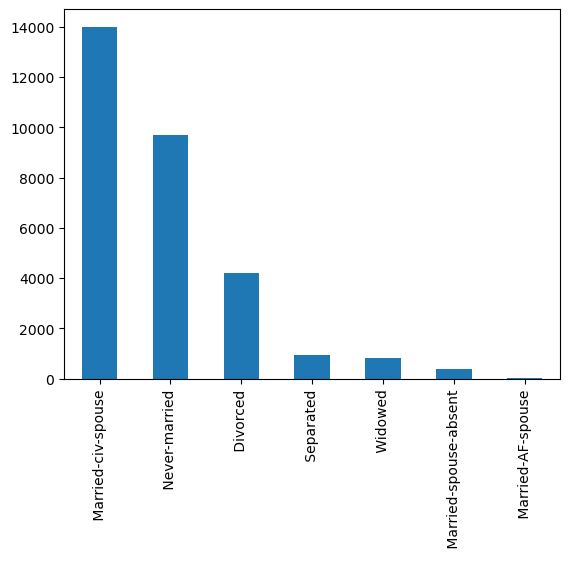

In [42]:
d1=df["maritalstatus"].value_counts()
d1.plot(kind="bar")

<AxesSubplot:>

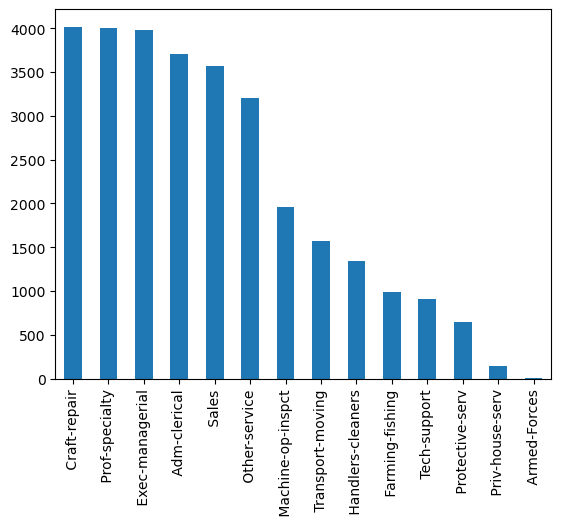

In [43]:
d1=df["occupation"].value_counts()
d1.plot(kind="bar")


<AxesSubplot:>

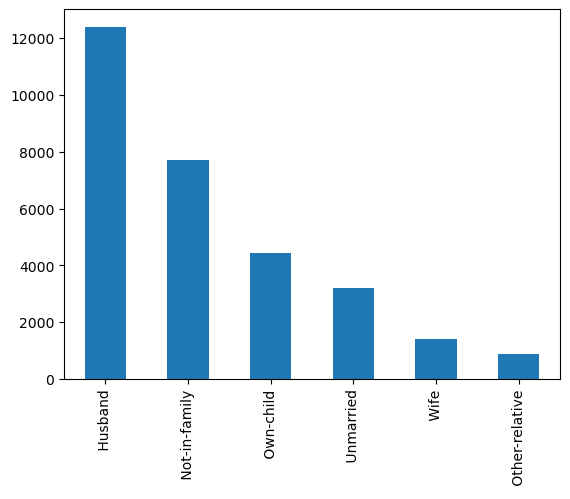

In [44]:
d1=df["relationship"].value_counts()
d1.plot(kind="bar")

<AxesSubplot:>

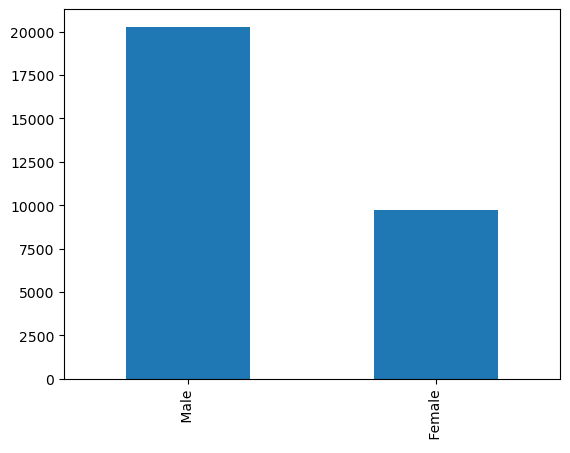

In [45]:
d1=df["sex"].value_counts()
d1.plot(kind="bar")

<AxesSubplot:>

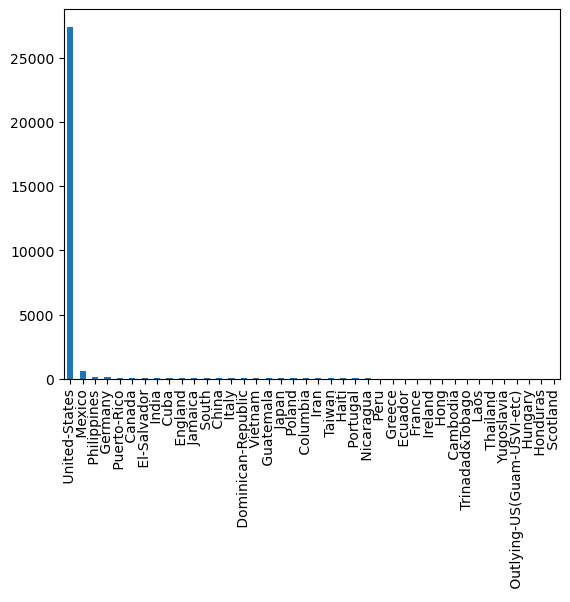

In [46]:
d1=df["native"].value_counts()
d1.plot(kind="bar")

<AxesSubplot:>

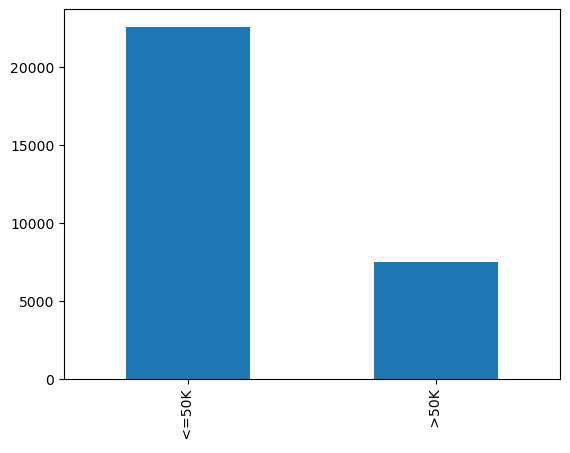

In [47]:
d1=df["Salary"].value_counts()
d1.plot(kind="bar")

In [48]:
#boxplot

In [49]:
df.shape

(30036, 14)

<AxesSubplot:>

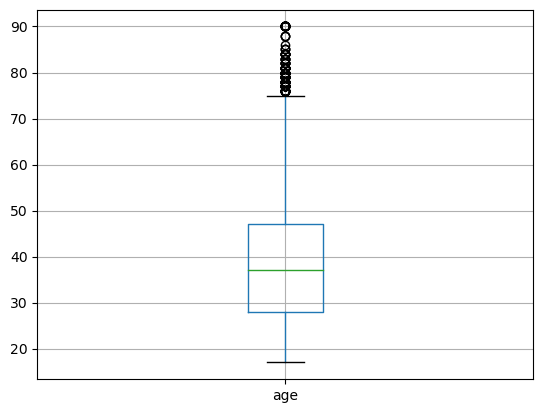

In [50]:
df.boxplot(column="age")

<AxesSubplot:>

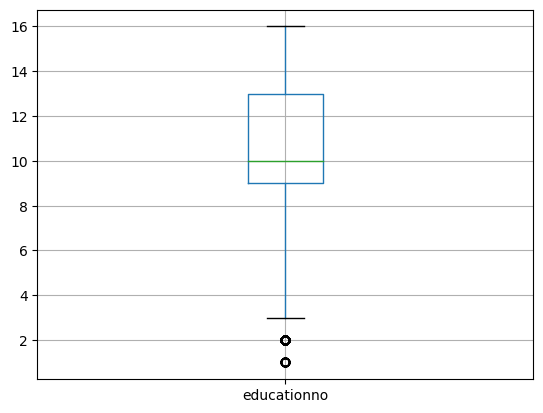

In [51]:
df.boxplot(column="educationno")

<AxesSubplot:>

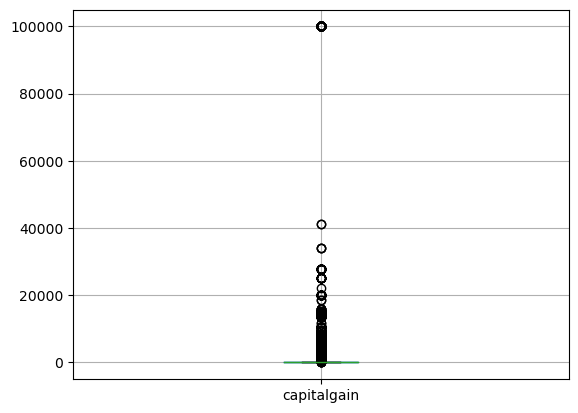

In [52]:
df.boxplot(column="capitalgain")

<AxesSubplot:>

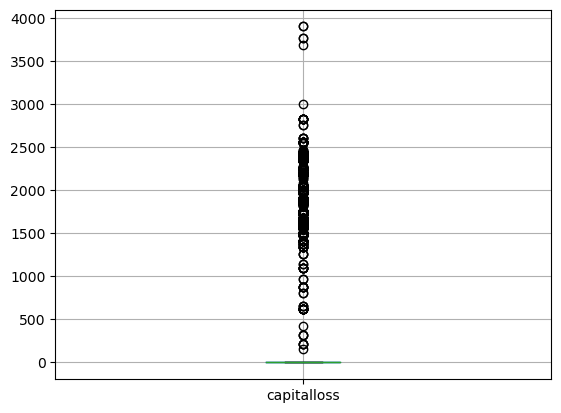

In [53]:
df.boxplot(column="capitalloss")

<AxesSubplot:>

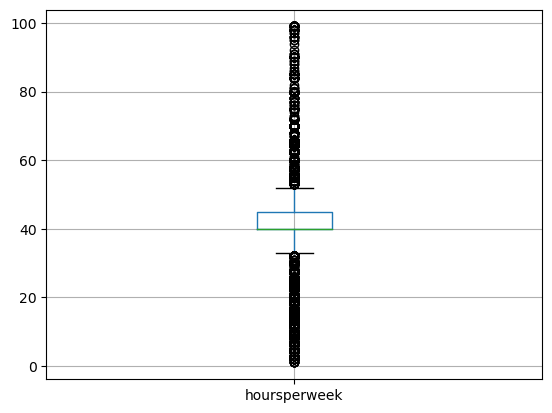

In [54]:
df.boxplot(column="hoursperweek")

In [55]:
#pairplot

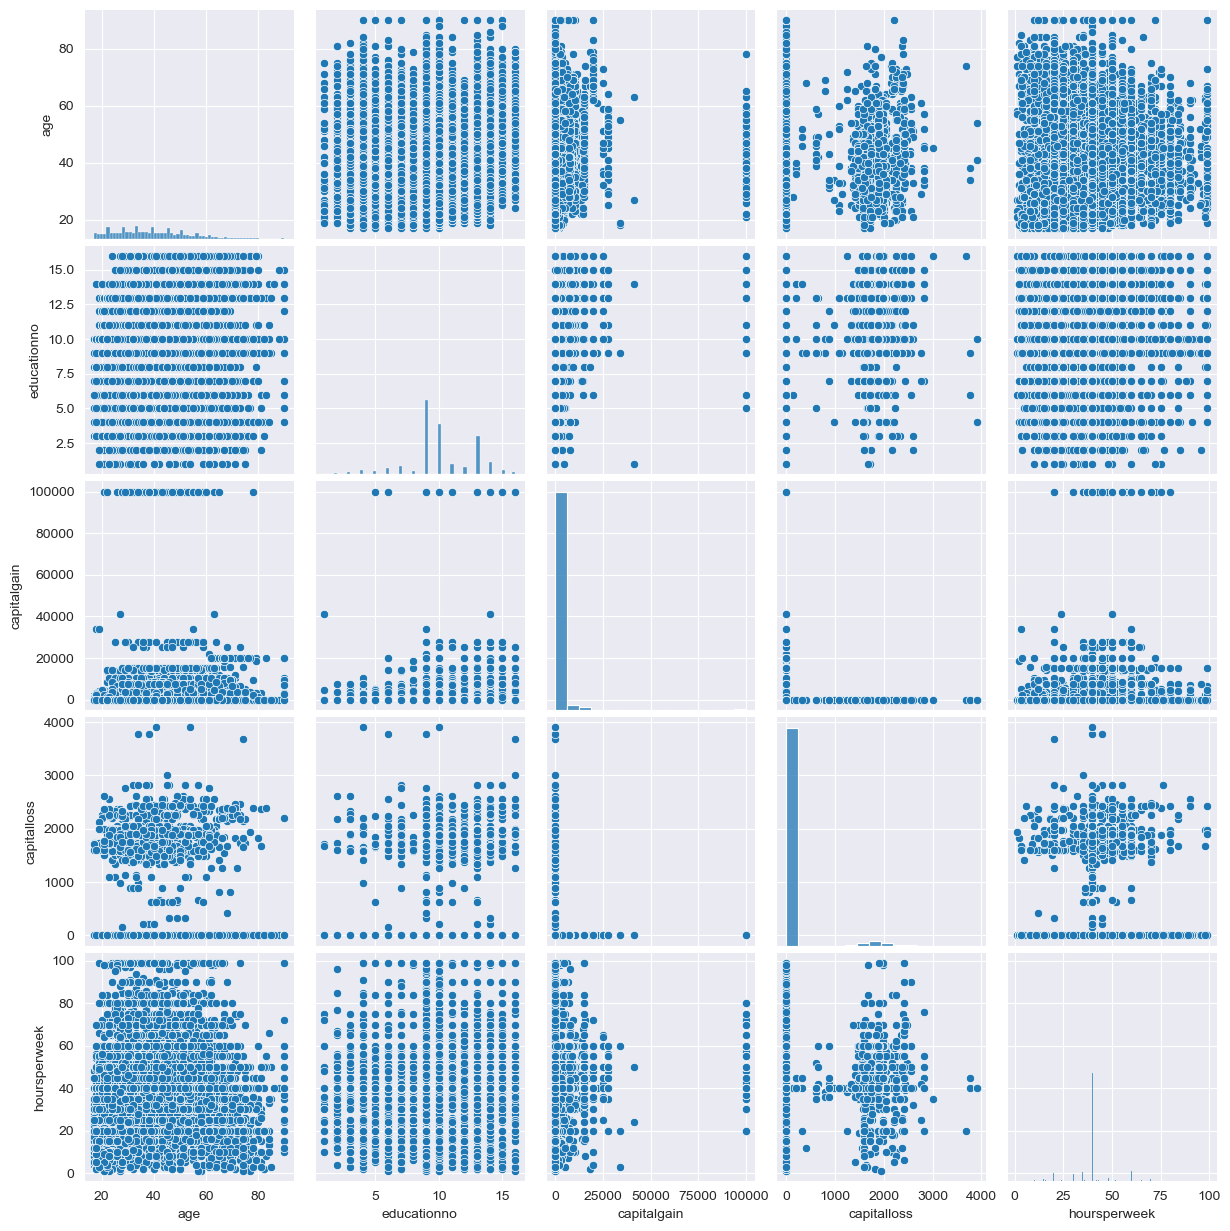

In [56]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [57]:
#heatmap

<AxesSubplot:>

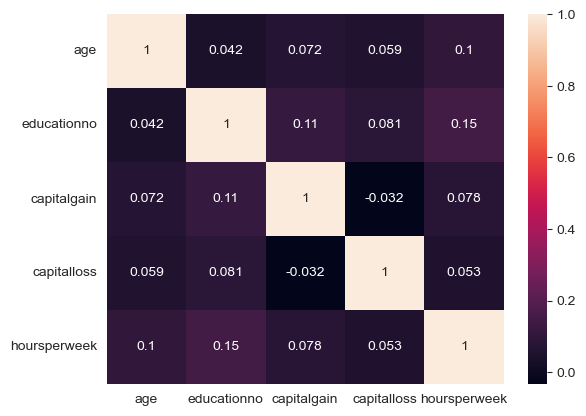

In [58]:
import seaborn as sn
sn.heatmap(df.corr(),annot=True)

In [59]:
#distance plot

<AxesSubplot:xlabel='age', ylabel='Density'>

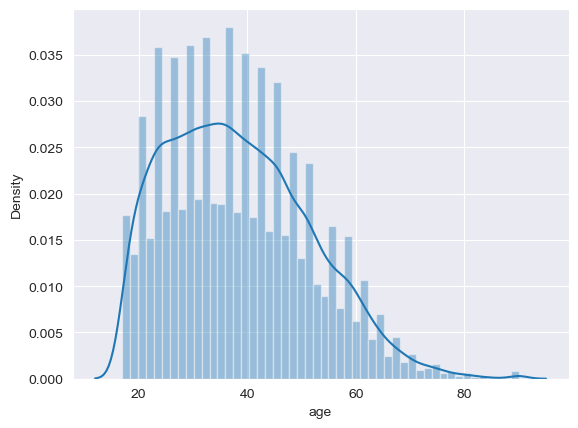

In [60]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='educationno', ylabel='Density'>

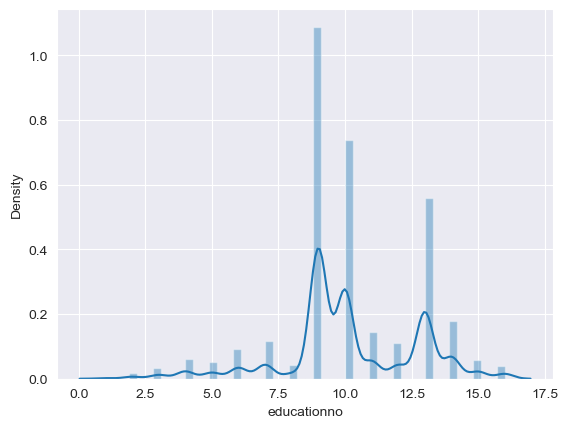

In [61]:
sns.distplot(df["educationno"])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

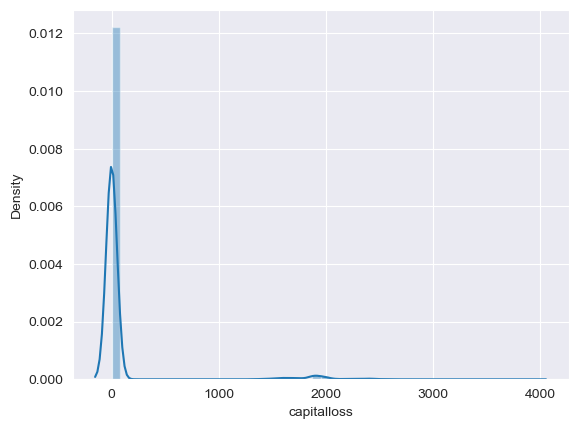

In [62]:
sns.distplot(df["capitalloss"])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

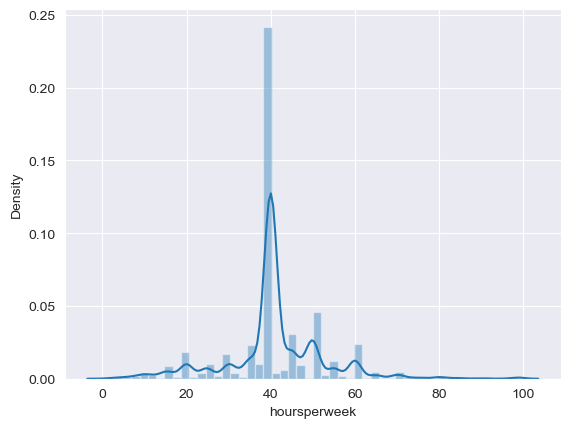

In [63]:
sns.distplot(df["hoursperweek"])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

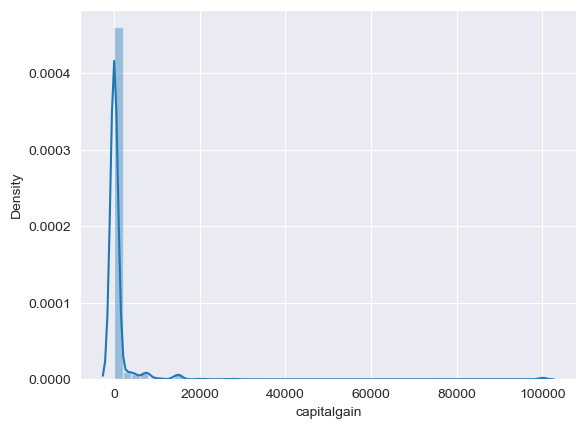

In [64]:
sns.distplot(df["capitalgain"])

In [65]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [66]:
import seaborn as sns

In [67]:
import seaborn as sn

In [68]:
df=df[df.columns[[0,3,9,10,11,1,2,4,5,6,7,8,12,13]]]

In [69]:
df

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,39,13,2174,0,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,13,0,0,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,9,0,0,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,7,0,0,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,13,0,0,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,40,9,0,0,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,58,9,0,0,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,22,9,0,0,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [70]:
#sqare root transformation

In [71]:
df[df.columns[[0,1,2,3,4]]]=df[df.columns[[0,1,2,3,4]]]**(1/2)

In [72]:
df[df.columns[[0,1,2,3,4]]]

,age,educationno,capitalgain,capitalloss,hoursperweek
0,6.244998,3.605551,46.626173,0.0,6.324555
1,7.071068,3.605551,0.000000,0.0,3.605551
2,6.164414,3.000000,0.000000,0.0,6.324555
3,7.280110,2.645751,0.000000,0.0,6.324555
4,5.291503,3.605551,0.000000,0.0,6.324555
...,...,...,...,...,...
30156,5.196152,3.464102,0.000000,0.0,6.164414
30157,6.324555,3.000000,0.000000,0.0,6.324555
30158,7.615773,3.000000,0.000000,0.0,6.324555
30159,4.690416,3.000000,0.000000,0.0,4.472136


<AxesSubplot:ylabel='Density'>

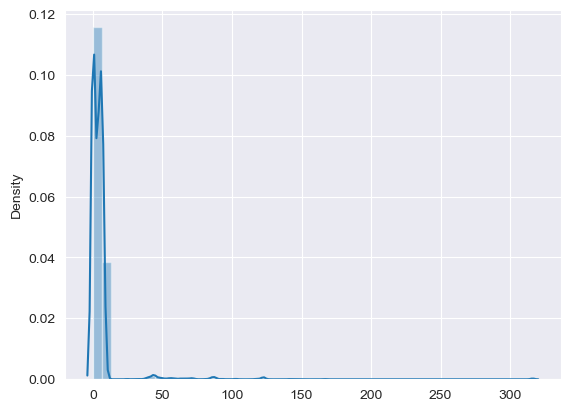

In [73]:
sns.distplot(df[df.columns[[0,1,2,3,4]]])

In [74]:
df.isnull().sum()

age              0
educationno      0
capitalgain      0
capitalloss      0
hoursperweek     0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [75]:
#sqare transformation

In [76]:
df[df.columns[[0,1,2,3,4]]]=df[df.columns[[0,1,2,3,4]]]**2

In [77]:
df[df.columns[[0,1,2,3,4]]]

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39.0,13.0,2174.0,0.0,40.0
1,50.0,13.0,0.0,0.0,13.0
2,38.0,9.0,0.0,0.0,40.0
3,53.0,7.0,0.0,0.0,40.0
4,28.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...
30156,27.0,12.0,0.0,0.0,38.0
30157,40.0,9.0,0.0,0.0,40.0
30158,58.0,9.0,0.0,0.0,40.0
30159,22.0,9.0,0.0,0.0,20.0


<AxesSubplot:ylabel='Density'>

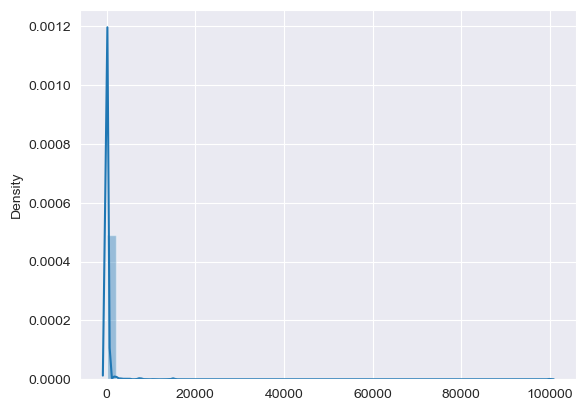

In [78]:
sns.distplot(df[df.columns[[0,1,2,3,4]]])

In [79]:
#Min Max Transformation

In [80]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()

In [81]:
df[df.columns[[0,1,2,3,4]]]=MM.fit_transform(df[df.columns[[0,1,2,3,4]]])

In [82]:
df[df.columns[[0,1,2,3,4]]]

,age,educationno,capitalgain,capitalloss,hoursperweek
0,0.301370,0.800000,0.021740,0.0,0.397959
1,0.452055,0.800000,0.000000,0.0,0.122449
2,0.287671,0.533333,0.000000,0.0,0.397959
3,0.493151,0.400000,0.000000,0.0,0.397959
4,0.150685,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...
30156,0.136986,0.733333,0.000000,0.0,0.377551
30157,0.315068,0.533333,0.000000,0.0,0.397959
30158,0.561644,0.533333,0.000000,0.0,0.397959
30159,0.068493,0.533333,0.000000,0.0,0.193878


<AxesSubplot:ylabel='Density'>

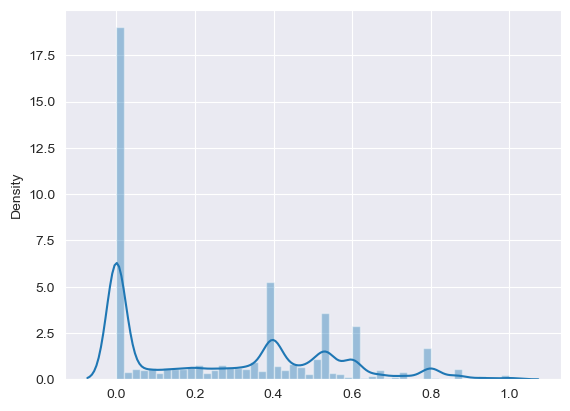

In [83]:
sns.distplot(df[df.columns[[0,1,2,3,4]]])

In [84]:
#Label Transformation

In [85]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [86]:
df[df.columns[[5,6,7,8,9,10,11,12,13]]]=LE.fit_transform(df[df.columns[[5,6,7,8,9,10,11,12,13]]])

ValueError: y should be a 1d array, got an array of shape (30036, 9) instead.

In [88]:
df["workclass"]=LE.fit_transform(df["workclass"])

In [89]:
df["education"]=LE.fit_transform(df["education"])

In [90]:
df["maritalstatus"]=LE.fit_transform(df["maritalstatus"])

In [91]:
df["occupation"]=LE.fit_transform(df["occupation"])

In [92]:
df["relationship"]=LE.fit_transform(df["relationship"])

In [93]:
df["race"]=LE.fit_transform(df["race"])

In [94]:
df["sex"]=LE.fit_transform(df["sex"])

In [95]:
df["Salary"]=LE.fit_transform(df["Salary"])

In [96]:
df["native"]=LE.fit_transform(df["native"])

In [97]:
df.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [98]:
df

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,0.301370,0.800000,0.021740,0.0,0.397959,5,9,4,0,1,4,1,37,0
1,0.452055,0.800000,0.000000,0.0,0.122449,4,9,2,3,0,4,1,37,0
2,0.287671,0.533333,0.000000,0.0,0.397959,2,11,0,5,1,4,1,37,0
3,0.493151,0.400000,0.000000,0.0,0.397959,2,1,2,5,0,2,1,37,0
4,0.150685,0.800000,0.000000,0.0,0.397959,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.733333,0.000000,0.0,0.377551,2,7,2,12,5,4,0,37,0
30157,0.315068,0.533333,0.000000,0.0,0.397959,2,11,2,6,0,4,1,37,1
30158,0.561644,0.533333,0.000000,0.0,0.397959,2,11,6,0,4,4,0,37,0
30159,0.068493,0.533333,0.000000,0.0,0.193878,2,11,4,0,3,4,1,37,0


In [99]:
#model fitting 

In [100]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~age+educationno+capitalgain+capitalloss+workclass+education+maritalstatus+occupation+relationship+race+sex+native",data=df).fit()

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     854.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:29:17   Log-Likelihood:                -13000.
No. Observations:               30036   AIC:                         2.603e+04
Df Residuals:                   30023   BIC:                         2.613e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3017      0.020    -15.031      0.000      -0.341      -0.262
age               0.3783      0.013     29.445      0.000       0.353       0.403
educationno       0.7552      0.014     54.622      0.000       0.728       0.782
capitalgain       1.0338      0.031     32.869      0.000       0.972       1.095
capitalloss       0.4592      0.021     21.873      0.000       0.418       0.500
workclass        -0.0142      0.002     -6.232      0.000      -0.019      -0.010
education        -0.0033      0.001     -5.435      0.000      -0.004      -0.002
maritalstatus    -0.0266      0.002    -17.608      0.000      -0.030      -0.024
occupation        0.0012      0.001      2.195      0.028       0.000       0.002
relationship     -0.0196      0.002    -11.360      0.000      -0.023      -0.016
race              0.0155      0.003      5.911      0.000       0.010       0.021
sex               0.1234      0.006     21.576      0.000       0.112       0.135
native           -0.0008      0.000     -2.054      0.040      -0.001   -3.44e-05
==============================================================================
Omnibus:                     2712.614   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3333.563
Skew:                           0.798   Prob(JB):                         0.00
Kurtosis:                       2.661   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model.resid

0       -0.369913
1       -0.495027
2       -0.289209
3       -0.234488
4       -0.188742
           ...   
30156   -0.149466
30157    0.732866
30158   -0.044857
30159   -0.054629
30160    0.754651
Length: 30036, dtype: float64

In [103]:
model.fittedvalues

0        0.369913
1        0.495027
2        0.289209
3        0.234488
4        0.188742
           ...   
30156    0.149466
30157    0.267134
30158    0.044857
30159    0.054629
30160    0.245349
Length: 30036, dtype: float64

In [104]:
#QQ PLOT

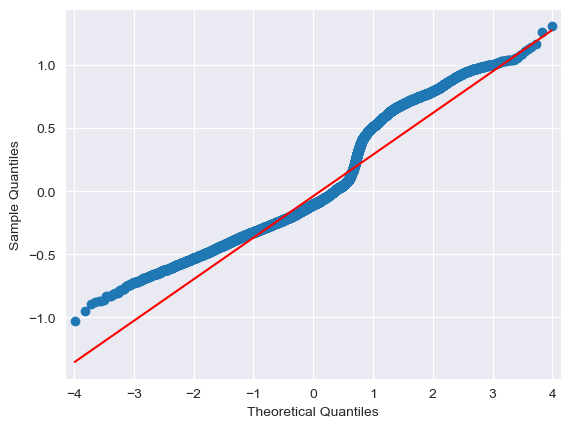

In [105]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line="q")

In [106]:
#cook distance

In [107]:
model_influence=model.get_influence()
(cooks,pvalue)=model_influence.cooks_distance
cooks=pd.DataFrame(cooks)
cooks[0].describe()

count    3.003600e+04
mean     3.368793e-05
std      8.526889e-05
min      1.228735e-12
25%      2.730488e-06
50%      1.116240e-05
75%      3.387605e-05
max      1.549510e-03
Name: 0, dtype: float64

In [108]:
#influence point

Text(0, 0.5, 'Cooks Distance')

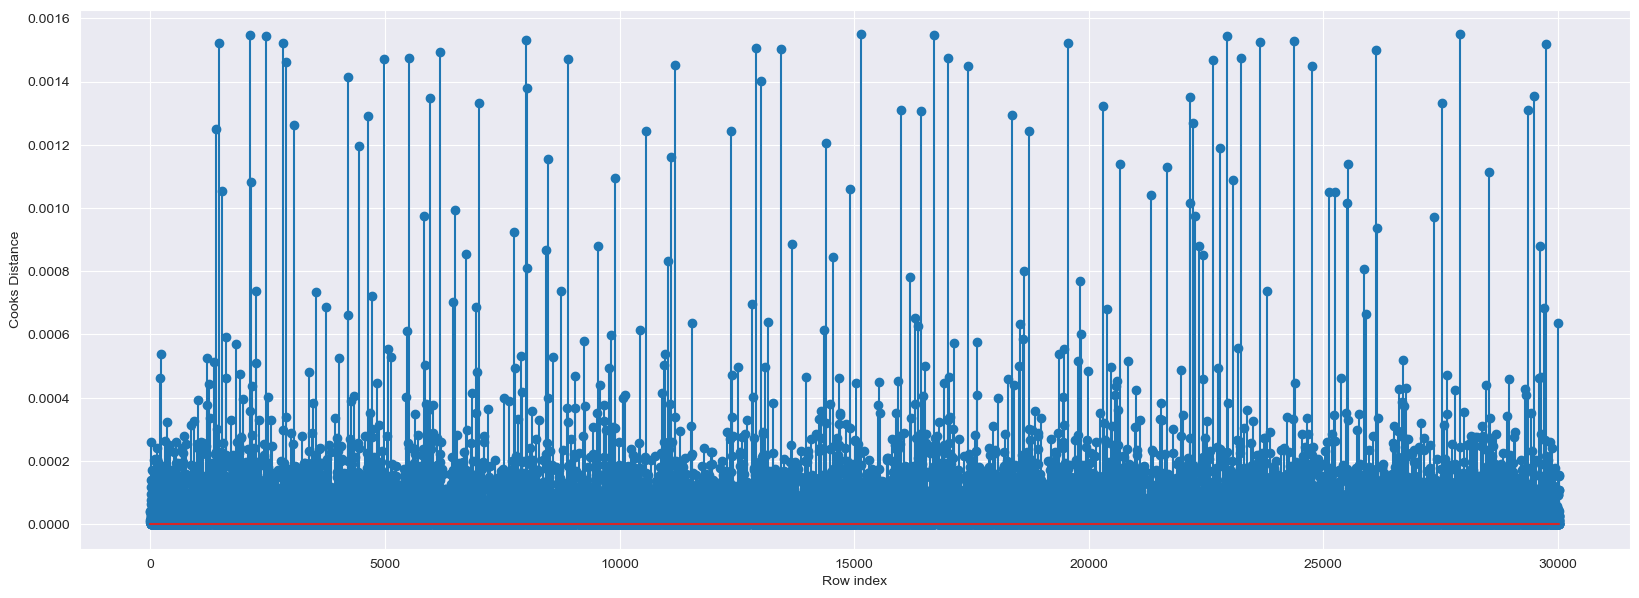

In [109]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),cooks[0])
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

<AxesSubplot:>

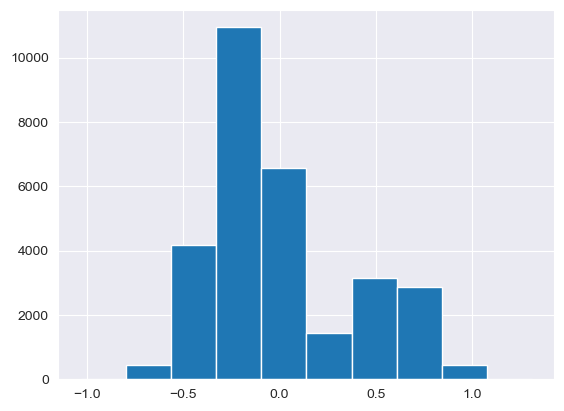

In [110]:
model.resid.hist()

Text(0, 0.5, 'model.resid')

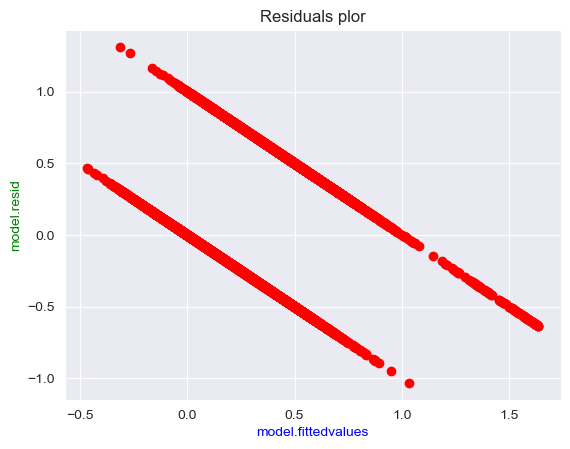

In [111]:
plt.scatter(model.fittedvalues,model.resid,color="red")
plt.title("Residuals plor")
plt.xlabel("model.fittedvalues",color="blue")
plt.ylabel("model.resid",color="green")

In [115]:
V=cooks[0][cooks[0]>0.001]

In [116]:
display(V)

1400     0.001249
1472     0.001521
1530     0.001055
2117     0.001546
2148     0.001081
           ...   
27925    0.001550
28535    0.001115
29368    0.001311
29499    0.001354
29738    0.001518
Name: 0, Length: 66, dtype: float64

In [113]:
#SPLIT X AND Y

In [117]:
X_train=df.iloc[:,0:-1]

In [118]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native
0,0.301370,0.800000,0.021740,0.0,0.397959,5,9,4,0,1,4,1,37
1,0.452055,0.800000,0.000000,0.0,0.122449,4,9,2,3,0,4,1,37
2,0.287671,0.533333,0.000000,0.0,0.397959,2,11,0,5,1,4,1,37
3,0.493151,0.400000,0.000000,0.0,0.397959,2,1,2,5,0,2,1,37
4,0.150685,0.800000,0.000000,0.0,0.397959,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.733333,0.000000,0.0,0.377551,2,7,2,12,5,4,0,37
30157,0.315068,0.533333,0.000000,0.0,0.397959,2,11,2,6,0,4,1,37
30158,0.561644,0.533333,0.000000,0.0,0.397959,2,11,6,0,4,4,0,37
30159,0.068493,0.533333,0.000000,0.0,0.193878,2,11,4,0,3,4,1,37


In [119]:
Y_train=df.iloc[:,-1:]

In [120]:
Y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [121]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

In [122]:
MNB.fit(X_train,Y_train)

MultinomialNB()

In [123]:
Y_pred_train=MNB.predict(X_train)

In [124]:
#model evalution

In [125]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_train,Y_pred_train)

In [126]:
print("Accuracy of training data is",accuracy.round(3))

Accuracy of training data is 0.768


In [127]:
from sklearn.metrics import recall_score
rs=recall_score(Y_train,Y_pred_train)

In [128]:
print("sensitivity of training data is",rs.round(3))

sensitivity of training data is 0.489


In [129]:
from sklearn.metrics import precision_score
ps=precision_score(Y_train,Y_pred_train)

In [130]:
print("precision of training data is",ps.round(3))

precision of training data is 0.535


In [131]:
from sklearn.metrics import f1_score
fs=f1_score(Y_train,Y_pred_train)

In [132]:
print("f1_score of training data is",fs.round(3))

f1_score of training data is 0.511


In [133]:
training_accuracy=[]
for i in range(0,101):
    MNB.fit(X_train,Y_train)
    Y_pred_train=MNB.predict(X_train)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))


In [134]:
print("average accuracy of training data is",np.mean(training_accuracy).round(3))

average accuracy of training data is 0.768


<AxesSubplot:xlabel='Salary'>

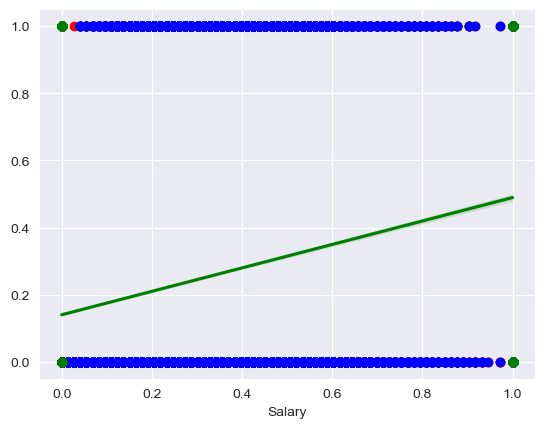

In [135]:
import seaborn as sns
plt.scatter(X_train.iloc[:,0],Y_train,color="red")
plt.scatter(X_train.iloc[:,0],Y_pred_train,color="blue")
sns.regplot(Y_train,Y_pred_train,color="green")